In [1]:
from model import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

from IPython.display import clear_output
print("done")
# for i in range(10):
#     clear_output(wait=True)
#     print(i, flush=True)

done


---
# 1

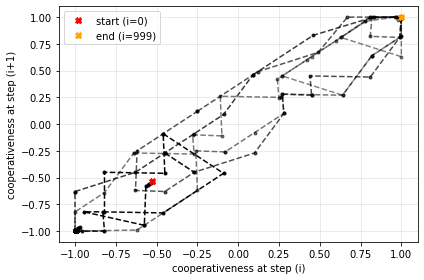

In [78]:
# x = np.load("../data/sigmoid_agent2-xarray.npy")
# y = np.load("../data/sigmoid_agent2-yrool.npy")
# x = np.load("../data/sigmoid_agent3-xarray.npy")
# y = np.load("../data/sigmoid_agent3-yrool.npy")

for steps in range(100):
    plt.plot(x[:-500][steps*5:(steps+1)*5+1], y[:-500][steps*5:(steps+1)*5+1], ".--", color="black", alpha=1-(steps/100))

plt.plot(x[0], y[0], "X", color="red", label="start (i=0)")
plt.plot(x[-2], y[-2], "X", color="orange", label="end (i=999)")
# plt.plot(x[:-1], y[:-1], "x-")
plt.xlabel("cooperativeness at step (i)")
plt.ylabel("cooperativeness at step (i+1)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend()
# plt.savefig("../img/agent_cooperativeness_alex_agent3.png", dpi=300)
plt.show()

---
# 2

In [19]:
sims = 5
steps = 500
data = np.zeros((sims, steps+1, 11))

for i in range(sims):
    model = RegionModel(
            international_trade = True
            ,efficiency_stdev = 2
            ,eu_tax = 0.2
            ,neighbor_influence = 0.05
            ,tax_influence = 0.1
            ,member_trade_multiplier = 2
            ,benefit_distribution = 0.9
        )
    for j in range(steps):
        clear_output(wait=True)
        percentage = i*steps + j
        print("{:.3f}%".format(percentage*100/(sims*steps)))
        model.step()
    # model.compute_statistics()
    # model.datacollector.collect(model)
    # print("{:.1f}%".format((((i)*len(columns))+(j+1))*100/(len(columns)*len(rows))))
    data[i] = model.datacollector.get_model_vars_dataframe()




99.960%


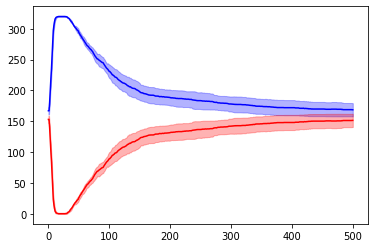

In [20]:
for v, c in zip([0,1], ["blue", "red"]):
    mean = np.mean(data[:, :, v], axis=0)
    std = np.std(data[:, :, v], axis=0)
    plt.fill_between(np.arange(steps+1), mean+std, mean-std, color=c, alpha=0.3)
    plt.plot(mean, color=c, alpha=1)
# plt.plot(data[0, :, 0], color="blue")
# plt.plot(data[0, :, 1], color="red")

---
# 3

59 261


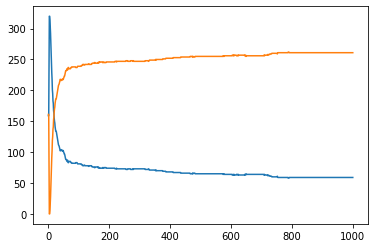

In [21]:
model = RegionModel(
     international_trade = True
    ,efficiency_stdev = 4
    ,eu_tax = .3123
    ,neighbor_influence = 0.53
    ,tax_influence = 0.8147
    ,member_trade_multiplier = 1.5
    ,benefit_distribution = 0.9
)
# agent = model.agents[5]
for _ in range(1000):
    clear_output(wait=True)
    # print(agent.cooperativeness)
    model.step()
    # print(agent.cooperativeness)
    print(model.member_count, model.other_count)

plt.plot(model.datacollector.get_model_vars_dataframe()["member_count"])
plt.plot(model.datacollector.get_model_vars_dataframe()["other_count"])

In [22]:
df = model.datacollector.get_agent_vars_dataframe()
# df.head()

In [38]:
f1 = True
f2 = True
for agent in range(1):
    if np.array(df["agent_cooperativeness"][:, agent])[-1] > 0:
        if f1:
            print("nice")
            plt.plot(df["agent_cooperativeness"][:,agent], ".-", color="blue", alpha=0.1, label="member at step 1000")
            f1 = False
        else:
            plt.plot(df["agent_cooperativeness"][:,agent], ".-", color="blue", alpha=0.1)
    else:
        if f2:
            plt.plot(df["agent_cooperativeness"][:,agent], ".-", color="red", alpha=0.1, label="outsider at step 1000")
            f2 = False
        else: plt.plot(df["agent_cooperativeness"][:,agent], ".-", color="red", alpha=0.1)
# plt.show()

plt.xlabel("time (steps)")
plt.ylabel("cooperativeness")
plt.tight_layout()
plt.legend()
# plt.savefig("../img/starwars.png", dpi=300)
plt.show()

NameError: name 'df' is not defined

In [24]:
# plt.plot(df["agent_cooperativeness"][:,1], "-x", color="black", alpha=1)
# plt.grid()
# plt.show()

In [25]:
# 3

In [39]:
for agent in range(1):
    # print(agent)
    # plt.plot(df["agent_cooperativeness"][:,2], np
    y = np.roll(df["agent_cooperativeness"][:,agent], shift=-1)
    x = np.array(df["agent_cooperativeness"][:,agent])
    # print(x-y)
    plt.plot(x[:-1], y[:-1], "X-", color="black", alpha=0.1)
    # print(x)
    
plt.show()

NameError: name 'df' is not defined

---
# 4

In [42]:
rows = np.linspace(0, 0.4, 5)
columns = [.7, .75, .8, .85, .9, .95, 1, 1.05, 1.10]
sims = 1
steps = 500

data = np.zeros((len(rows), len(columns), sims, 11))

for i, EUT in enumerate(rows):
    for j, BD in enumerate(columns):
        for k in range(sims):
            model = RegionModel(
                international_trade = True
                ,efficiency_stdev = 2
                ,eu_tax = EUT
                ,neighbor_influence = 0.05
                ,tax_influence = 0.1
                ,member_trade_multiplier = 2
                ,benefit_distribution = BD
            )
            for l in range(steps):
                clear_output(wait=True)
                percentage = i*len(columns)*sims*steps + j*sims*steps + k*steps + l
                print("{:.3f}%".format(percentage*100/(len(rows)*len(columns)*sims*steps)))
                model.step()
            model.compute_statistics()
            model.datacollector.collect(model)
            # print("{:.1f}%".format((((i)*len(columns))+(j+1))*100/(len(columns)*len(rows))))
            data[i,j,k] = model.datacollector.get_model_vars_dataframe()
            # 7/0
            

99.996%


In [43]:
# x = np.copy(data)

In [44]:
# np.save("230121_18h00_tax-linspace-008-05-7_benefit-linspace-05-095-7_sims-5_steps-500", data)
# model.datacollector.collect(model)
# model.datacollector.get_model_vars_dataframe()
# xyz = np.load("230121_18h00_tax-linspace-008-05-7_benefit-linspace-05-095-7_sims-5_steps-500.npy")

In [54]:
# np.save("../data/matrix_new.npy", data)
# data = np.load("../data/matrix_new.npy")

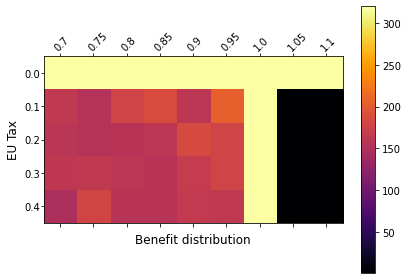

-------------------------------------------------------


ZeroDivisionError: division by zero

In [55]:
mean = np.mean(data, axis=2)

for i, name in enumerate(model.datacollector.get_model_vars_dataframe().columns):

    fig = plt.figure()
    ax = fig.add_subplot()
    cax = ax.matshow(mean[:,:,i], cmap="inferno")
    plt.xlabel("Benefit distribution", labelpad=10)
    ax.yaxis.label.set_size(12)
    ax.xaxis.label.set_size(12)
    plt.ylabel("EU Tax")
    ax.set_yticklabels([''] + list(np.round(rows, 3)))  
    ax.set_xticklabels([''] + list(np.round(columns, 3)))
    # ax.xaxis.set_ticks_position('bottom')
    plt.setp(ax.get_xticklabels(), rotation=45, ha="left", rotation_mode="anchor")
    plt.colorbar(cax)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.tight_layout()
    ax.tick_params(axis="y", pad=0)
    ax.tick_params(axis="x", pad=0)
    # plt.title(name, pad=15, fontweight="bold")
    plt.tight_layout()
    # plt.savefig("../img/matrix_new_{}.png".format(name), dpi=300)
    plt.show()
    print("-------------------------------------------------------")
    9/0

---
# 6

In [56]:
x = np.linspace(0.7, 1.1, 20)
sims = 1
steps = 1

data = np.zeros((len(x), sims, 11))

for i, BD in enumerate(x):
    for k in range(sims):
        model = RegionModel(
            international_trade = True
            ,efficiency_stdev = 2
            ,eu_tax = 0.1
            ,neighbor_influence = 0.05
            ,tax_influence = 0.1
            ,member_trade_multiplier = 2
            ,benefit_distribution = BD
        )
        for l in range(steps):
            clear_output(wait=True)
            percentage = i*sims*steps + k*steps + l
            print("{:.3f}%".format(percentage*100/(len(x)*sims*steps)))
            model.step()
        model.compute_statistics()
        model.datacollector.collect(model)
        # print("{:.1f}%".format((((i)*len(columns))+(j+1))*100/(len(columns)*len(rows))))
        data[i,k] = model.datacollector.get_model_vars_dataframe()

95.000%


In [57]:
# np.save("../data/gini_vs_wealth", data)
data = np.load("../data/gini_vs_wealth.npy")

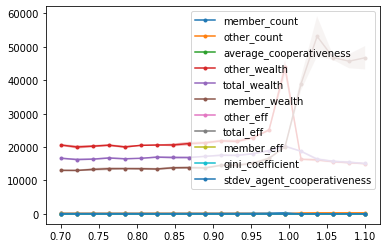

In [59]:
mean = np.mean(data, axis=1)
std = np.std(data, axis=1)
for i, name in enumerate(model.datacollector.get_model_vars_dataframe().columns):

    plt.plot(x, mean[:,i], ".-", label=name)
    plt.fill_between(x, mean[:,i]+std[:,i], mean[:,i]-std[:,i], alpha=0.3)
    plt.legend()
    # plt.show()


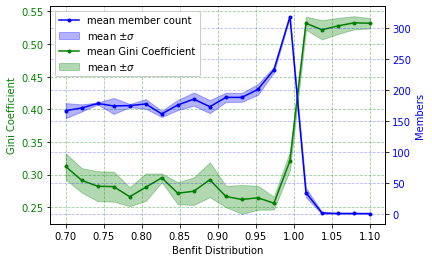

In [62]:
mean = np.mean(data, axis=1)
std = np.std(data, axis=1)

fig, ax2 = plt.subplots(figsize=(6, 4))
ax1 = ax2.twinx()
l1, = ax1.plot(x, mean[:,0], ".-", label="mean member count", color="blue")
l2 = ax1.fill_between(x, mean[:,0]+std[:,0], mean[:,0]-std[:,0], alpha=0.3, color="blue", label="mean $\pm\sigma$")
l3, = ax2.plot(x, mean[:,9], ".-", color="green", label="mean Gini Coefficient")
l4 = ax2.fill_between(x, mean[:,9]+std[:,9], mean[:,9]-std[:,9], alpha=0.3, color="green", label="mean $\pm\sigma$")
plt.legend()
ax1.grid(color="blue", linestyle="--", alpha=0.3, zorder=0)
ax1.set_ylabel("Members", color="blue")
ax2.set_xlabel("Benfit Distribution", color="black")
ax1.tick_params(axis='y', labelcolor="blue")

ax2.grid(color="green", linestyle="--", alpha=0.4, zorder=0, which="both")
ax2.set_ylabel("Gini Coefficient", color="green")
ax2.tick_params(axis='y', labelcolor="green")
lines = [l1, l2, l3, l4]
ax1.legend(lines, [l.get_label() for l in lines], facecolor="white", framealpha=1)
# plt.savefig("../img/gini_vs_members.png", dpi=300)
plt.show()

---
# 5) Bistability Analysis

In [8]:
x = np.linspace(1.4, 2.5, 10)
y = np.zeros(10)

for i, MR in enumerate(x):
    model = RegionModel(
        international_trade = True
        ,efficiency_stdev = 1
        ,eu_tax = 0.2
        ,neighbor_influence = 0.000001
        ,tax_influence = 0.4
        ,member_trade_multiplier = MR
        ,benefit_distribution = 0.9
    )

    for _ in range(1000):
        model.step()
    print(i)
    model.compute_statistics()
    y[i] = model.member_count
    

# plt.plot(x, y)

0
1
2
3
4
5
6
7
8
9


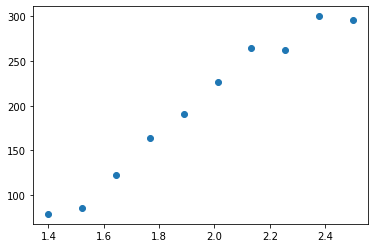

In [9]:
plt.plot(x, y, "o")